In [19]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import os
import re
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
import nltk
nltk.download('stopwords')
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import random

init_notebook_mode(connected=True) #do not miss this line
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yunzehui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def datelist(start_month, end_month):
    start_year = int(start_month[:4])
    start_month = int(start_month[-2:])
    end_year = int(end_month[:4])
    end_month = int(end_month[-2:])
    if start_year == end_year:
        month_range = range(start_month, end_month + 1)
        date_list = ["{year}-{month:0=2d}".format(year=str(start_year), month=M) for M in month_range]
        return date_list
    year_range = range(start_year + 1, end_year)
    start_year_month_range = range(start_month, 13)
    end_year_month_range = range(1, end_month + 1)
    date_list = ["{year}-{month:0=2d}".format(year=str(start_year), month=M) for M in start_year_month_range]
    date_list += ["{year}-{month:0=2d}".format(year=str(Y), month=M) for Y in year_range for M in range(1, 13)]
    date_list += ["{year}-{month:0=2d}".format(year=str(end_year), month=M) for M in end_year_month_range]
    return date_list

# Discount Brokerage

In [166]:
start_month='2017-06'
end_month='2020-05'

dl = datelist(start_month, end_month)
filepath=[]
for i in range(len(dl)):
    pathi = 'result/Discount Brokerage/'+dl[i]+'.json'
    filepath.append(pathi)

tweets_db = pd.DataFrame(columns=['text', 'label', 'score', 'elapsed_time'])
scores_db = pd.DataFrame(columns=('time', 'avg_score'))
for i in range(len(dl)):
    j=open(filepath[i])
    info = json.load(j)
    data = pd.DataFrame(eval(info))
    tweets_db = tweets_db.append(data)
    scores_db = scores_db.append(pd.DataFrame({'time':[dl[i]], 'avg_score':[np.average(data['score'])]}),ignore_index=True)

In [213]:
score_dist_db = tweets_db["label"].value_counts().to_frame()
score_dist_db.columns = ["count"]
score_dist_db = score_dist_db.reset_index().sort_values(by = "index" ,ascending = False)

layout = go.Layout(dict(title = "Scores distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        )
                  )

trace = go.Bar(x = score_dist_db["index"],
               y = score_dist_db["count"],
               marker = dict(line = dict(width = 1,color = "black"),
                             color = "gold")
              )


fig = go.Figure(data = [trace],layout = layout)
py.offline.iplot(fig)

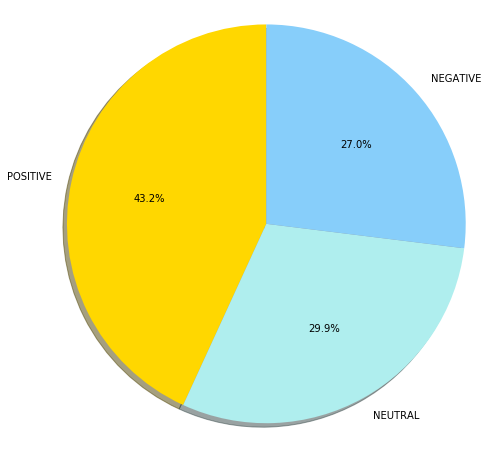

In [220]:
colors = ['gold','paleturquoise','lightskyblue']
labels_db = list(score_dist_db['index'].values)
sizes_db = list(score_dist_db['count'].values/sum(score_dist_db['count'].values)*100)
#explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes_db, labels=labels_db, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

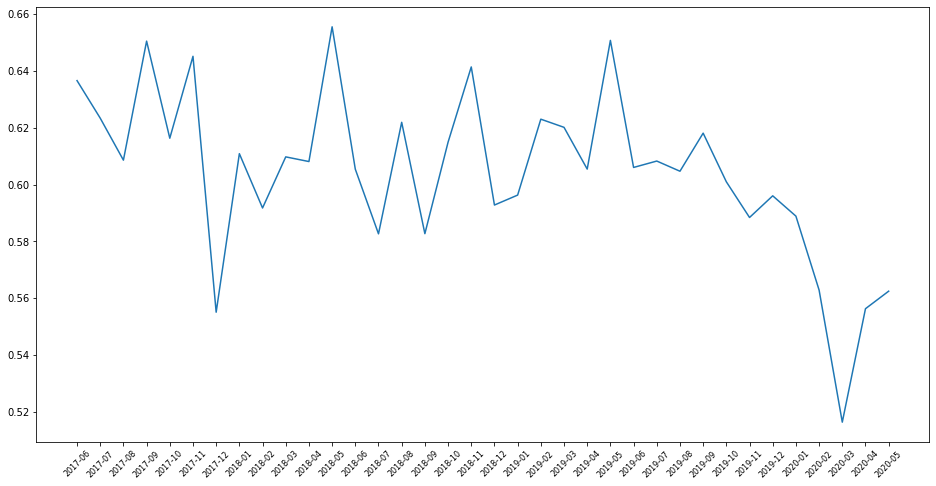

In [152]:
plt.figure(figsize=(16,8))
plt.plot(scores_db['avg_score'])
plt.xticks(range(0,len(dl)), dl)
plt.tick_params(axis='x', labelsize=8) 
plt.xticks(rotation=45) 
plt.show

# Robo Advisor

In [169]:
start_month='2017-06'
end_month='2019-04'

dl = datelist(start_month, end_month)
filepath=[]
for i in range(len(dl)):
    pathi = 'result/Robo/'+dl[i]+'.json'
    filepath.append(pathi)

tweets_ra = pd.DataFrame(columns=['text', 'label', 'score', 'elapsed_time'])
scores_ra = pd.DataFrame(columns=('time', 'avg_score'))
for i in range(len(dl)):
    j=open(filepath[i])
    info = json.load(j)
    data = pd.DataFrame(eval(info))
    tweets_ra = tweets_ra.append(data)
    scores_ra = scores_ra.append(pd.DataFrame({'time':[dl[i]], 'avg_score':[np.average(data['score'])]}),ignore_index=True)

In [221]:
score_dist_ra = tweets_ra["label"].value_counts().to_frame()
score_dist_ra.columns = ["count"]
score_dist_ra = score_dist_ra.reset_index().sort_values(by = "index" ,ascending = False)

layout = go.Layout(dict(title = "Scores distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        )
                  )

trace = go.Bar(x = score_dist_ra["index"],
               y = score_dist_ra["count"],
               marker = dict(line = dict(width = 1,color = "black"),
                             color = "gold")
              )


fig = go.Figure(data = [trace],layout = layout)
py.offline.iplot(fig)

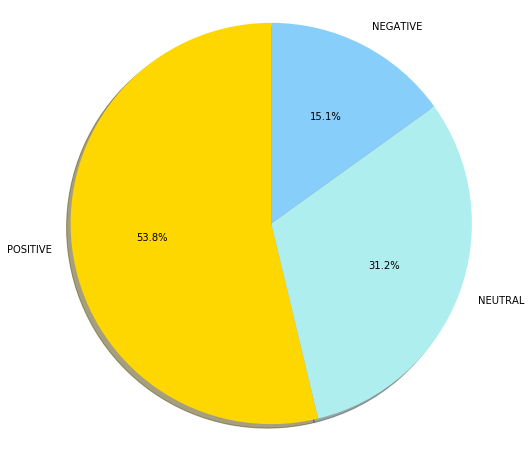

In [219]:
colors = ['gold','paleturquoise','lightskyblue']
labels_ra = list(score_dist_ra['index'].values)
sizes_ra = list(score_dist_ra['count'].values/sum(score_dist_ra['count'].values)*100)
#explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes_ra, labels=labels_ra, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

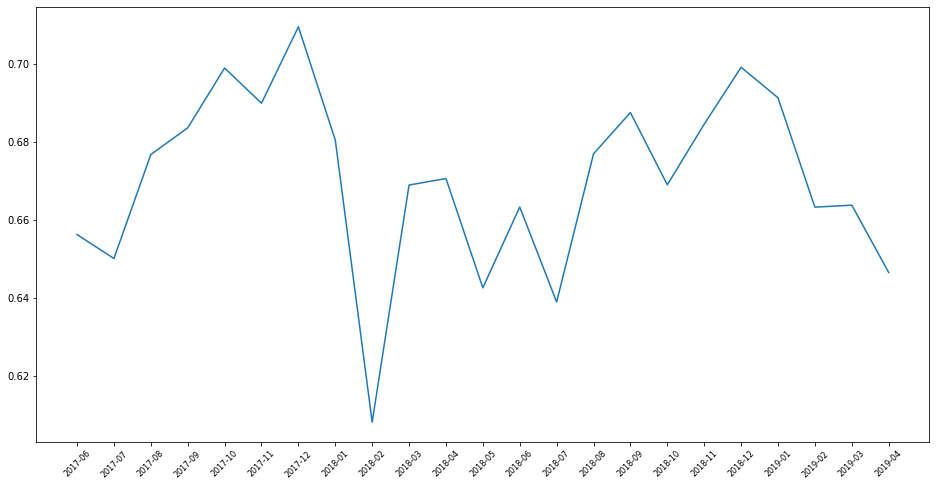

In [154]:
plt.figure(figsize=(16,8))
plt.plot(scores_ra['avg_score'])
plt.xticks(range(0,len(dl)), dl)
plt.tick_params(axis='x', labelsize=8) 
plt.xticks(rotation=45) 
plt.show

# Bank Brokerage

In [123]:
start_month='2017-06'
end_month='2020-05'

dl = datelist(start_month, end_month)
filepath=[]
for i in range(len(dl)):
    pathi = 'result/Bank Brokerage/'+dl[i]+'.json'
    filepath.append(pathi)

tweets_bb = pd.DataFrame(columns=['text', 'label', 'score', 'elapsed_time'])
scores_bb = pd.DataFrame(columns=('time', 'avg_score'))
for i in range(len(dl)):
    j=open(filepath[i])
    info = json.load(j)
    data = pd.DataFrame(eval(info))
    tweets_bb = tweets_bb.append(data)
    scores_bb = scores_bb.append(pd.DataFrame({'time':[dl[i]], 'avg_score':[np.average(data['score'])]}),ignore_index=True)

In [222]:
score_dist_bb = tweets_bb["label"].value_counts().to_frame()
score_dist_bb.columns = ["count"]
score_dist_bb = score_dist_bb.reset_index().sort_values(by = "index" ,ascending = False)

layout = go.Layout(dict(title = "Scores distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        )
                  )

trace = go.Bar(x = score_dist_bb["index"],
               y = score_dist_bb["count"],
               marker = dict(line = dict(width = 1,color = "black"),
                             color = "gold")
              )


fig = go.Figure(data = [trace],layout = layout)
py.offline.iplot(fig)

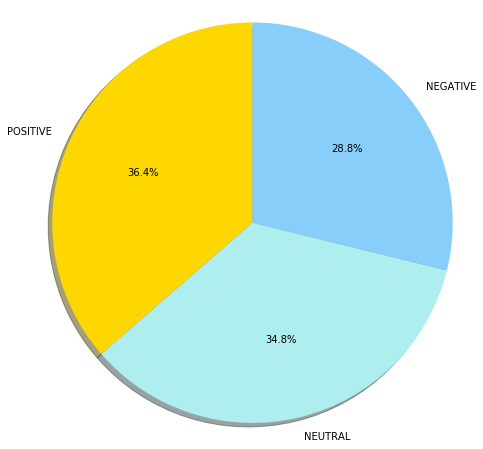

In [218]:
colors = ['gold','paleturquoise','lightskyblue']
labels_bb = list(score_dist_bb['index'].values)
sizes_bb = list(score_dist_bb['count'].values/sum(score_dist_bb['count'].values)*100)
#explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes_bb, labels=labels_bb, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

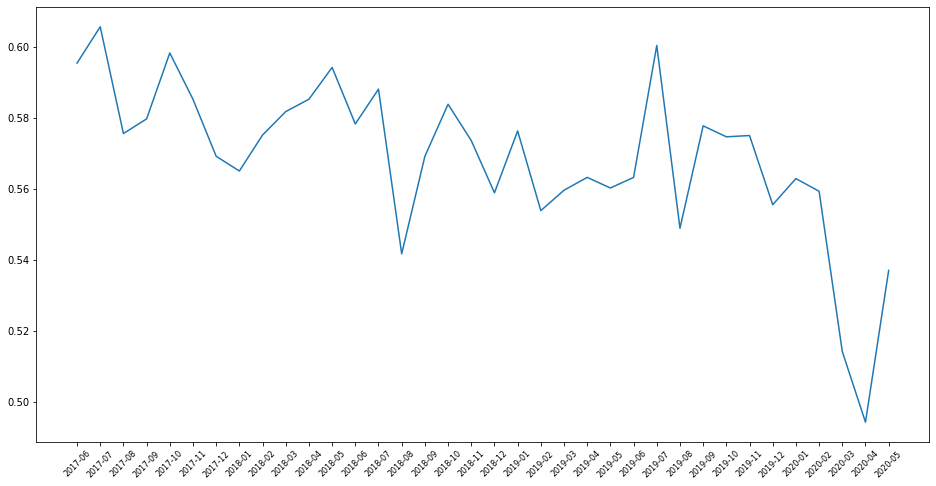

In [151]:
plt.figure(figsize=(16,8))
plt.plot(scores_bb['avg_score'])
plt.xticks(range(0,len(dl)), dl)
plt.tick_params(axis='x', labelsize=8) 
plt.xticks(rotation=45) 
plt.show

# Full Brokerage

In [179]:
start_month='2017-06'
end_month='2020-05'

dl = datelist(start_month, end_month)
filepath=[]
for i in range(len(dl)):
    pathi = 'result/Full Brokerage/'+dl[i]+'.json'
    filepath.append(pathi)

tweets_fb = pd.DataFrame(columns=['text', 'label', 'score', 'elapsed_time'])
scores_fb = pd.DataFrame(columns=('time', 'avg_score'))
for i in range(len(dl)):
    j=open(filepath[i])
    info = json.load(j)
    data = pd.DataFrame(eval(info))
    tweets_fb = tweets_fb.append(data)
    scores_fb = scores_fb.append(pd.DataFrame({'time':[dl[i]], 'avg_score':[np.average(data['score'])]}),ignore_index=True)

In [223]:
score_dist_fb = tweets_fb["label"].value_counts().to_frame()
score_dist_fb.columns = ["count"]
score_dist_fb = score_dist_fb.reset_index().sort_values(by = "index" ,ascending = False)

layout = go.Layout(dict(title = "Scores distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        )
                  )

trace = go.Bar(x = score_dist_fb["index"],
               y = score_dist_fb["count"],
               marker = dict(line = dict(width = 1,color = "black"),
                             color = "gold")
              )


fig = go.Figure(data = [trace],layout = layout)
py.offline.iplot(fig)

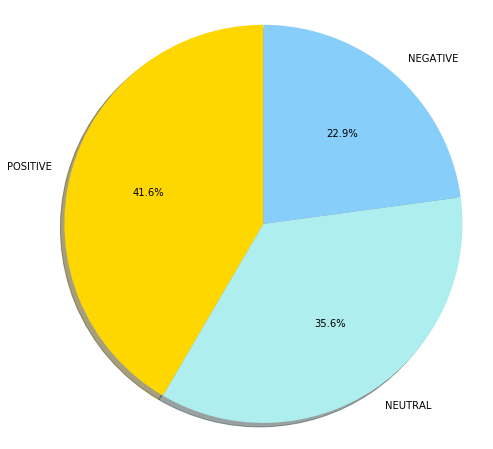

In [217]:
colors = ['gold','paleturquoise','lightskyblue']
labels_fb = list(score_dist_fb['index'].values)
sizes_fb = list(score_dist_fb['count'].values/sum(score_dist_fb['count'].values)*100)
#explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes_fb, labels=labels_fb, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

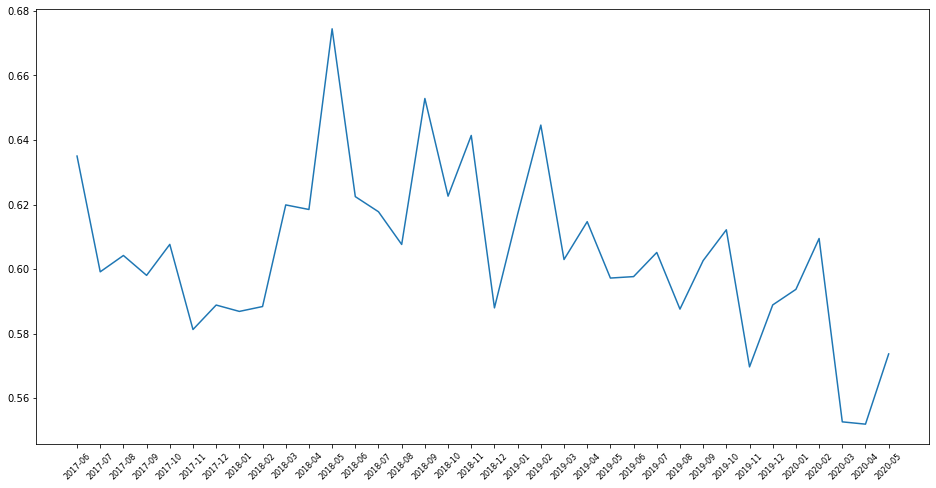

In [182]:
plt.figure(figsize=(16,8))
plt.plot(scores_fb['avg_score'])
plt.xticks(range(0,len(dl)), dl)
plt.tick_params(axis='x', labelsize=8) 
plt.xticks(rotation=45) 
plt.show

# Comparasion

<function matplotlib.pyplot.show(*args, **kw)>

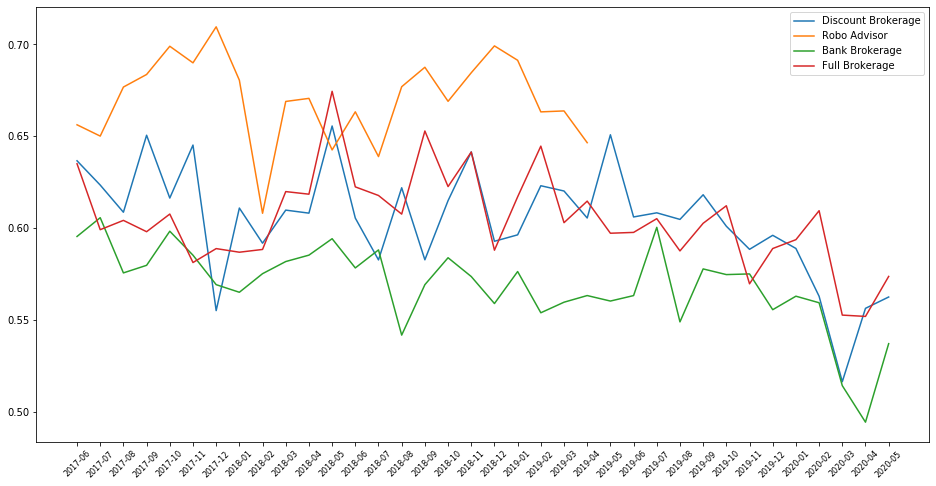

In [183]:
plt.figure(figsize=(16,8))
plt.plot(scores_db['avg_score'], label = 'Discount Brokerage')
plt.plot(scores_ra['avg_score'], label = 'Robo Advisor')
plt.plot(scores_bb['avg_score'], label = 'Bank Brokerage')
plt.plot(scores_fb['avg_score'], label = 'Full Brokerage')
plt.xticks(range(0,len(dl)), dl)
plt.tick_params(axis='x', labelsize=8) 
plt.xticks(rotation=45) 
plt.legend()
plt.show

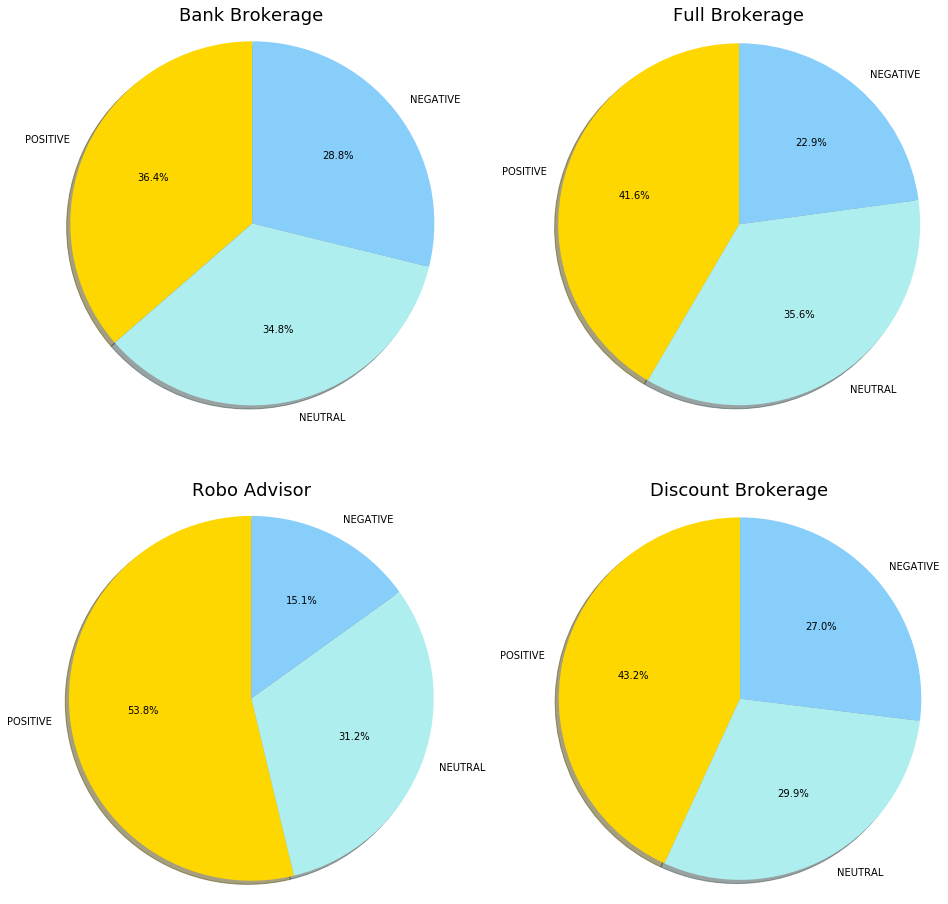

In [228]:
colors = ['gold','paleturquoise','lightskyblue']
fig, axs = plt.subplots(2, 2,figsize=(16,16))

axs[0,0].pie(sizes_bb, labels=labels_bb, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,0].axis('equal') 
axs[0,0].set_title("Bank Brokerage",fontsize = 18)

axs[0,1].pie(sizes_fb, labels=labels_fb, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,1].axis('equal') 
axs[0,1].set_title("Full Brokerage",fontsize = 18)

axs[1,0].pie(sizes_ra, labels=labels_ra, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,0].axis('equal') 
axs[1,0].set_title("Robo Advisor",fontsize = 18)

axs[1,1].pie(sizes_db, labels=labels_db, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,1].axis('equal') 
axs[1,1].set_title("Discount Brokerage",fontsize = 18)


plt.show()